<a href="https://colab.research.google.com/github/VictorTrigo/Estadistica-Computacional/blob/master/leccion03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import collections

In [ ]:
datos = (15, 32, 7, 55, 19, 23, 42, 17)

Promedio Aritmetico

In [ ]:
def promedio(datos):
  suma = 0
  n = len(datos)
  for x in datos:
    suma = suma + x
  prom = suma / n
  return prom

In [ ]:
p = promedio(datos)
print('El resultado del promedio es: ', p)

El resultado del promedio es:  26.25


Varianza

In [ ]:
def varianza(datos):
  suma = 0
  n = len(datos)
  prom = promedio(datos)
  for x in datos:
    suma = suma + (x - prom)**2
  var = suma/n
  return var

In [ ]:
var = varianza(datos)
print("El resultado de la varianza es: ", var)

El resultado de la varianza es:  219.1875


Máximo

In [ ]:
def maximo(datos):
  mx = datos[0]
  for x in datos:
    if x > mx:
      mx = x
  return mx

In [ ]:
max = maximo(datos)
print("Maximo = ", max)

Maximo =  55


Mínimo

In [ ]:
def minimo(datos):
  n = len(datos)
  mn = datos[n-1]
  for x in datos:
    if x < mn:
      mn = x
  return mn

In [ ]:
min = minimo(datos)
print("Minimo = ", min)

Minimo =  7


Cuartiles

In [ ]:
def cuartil(datos, q=2):
  datos.sort()
  n = len(datos)
  pos = int(q*(n+1)/4)
  alpha = q*(n+1)/4-pos
  return (1-alpha)*datos[pos-1] + alpha*datos[pos]

In [ ]:
q2 = cuartil(np.array(datos))
q2

21.0

Percentiles

In [ ]:
def percentil(datos, q=50):
  datos.sort()
  n = len(datos)
  pos = int(q*(n+1)/100)
  alpha = q*(n+1)/100-pos
  return (1-alpha)*datos[pos-1] + alpha*datos[pos]

In [ ]:
q50 = percentil(np.array(datos))
q50

21.0

Histograma de Frecuencias

In [ ]:
def histograma(datos, n_bins):
  n = len(datos)
  mx = maximo(datos)
  mn = minimo(datos)
  rango = mx - mn
  a = rango/n_bins
  limites = [(mn+i*a, mn+(i+1)*a) for i in range(n_bins)]
  T = {'datos':[], 'index':[], 'lim_inf':[], 'lim_sup':[], 'marca':[], 'n':[], 'f':[], 'ancho':a}
  i = 0
  for (lim_inf, lim_sup) in limites:
    G = [x for x in datos if x>lim_inf and x<lim_sup]
    T["datos"].append(G)
    T['index'].append(i)
    T['lim_inf'].append(lim_inf)
    T['lim_sup'].append(lim_sup)
    T["marca"].append((lim_inf+lim_sup)/2)
    T["n"].append(len(G))
    T["f"].append(len(G)/n)
    i = i+1
  return T

<BarContainer object of 5 artists>

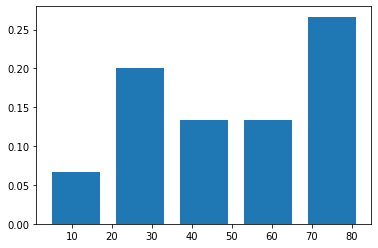

In [ ]:
datos = [10, 25, 36, 3, 27, 45, 73, 83, 21, 54, 67, 53, 68, 73, 81]
T = histograma(datos, 5)

plt.bar(T["marca"], T["f"], width=0.75*T["ancho"])

Tabla de Frecuencias

In [ ]:
#del T["datos"]
#del T["ancho"]

print(tabulate(T, headers=T.keys()))

  index    lim_inf    lim_sup    marca    n          f
-------  ---------  ---------  -------  ---  ---------
      0          3         19       11    1  0.0666667
      1         19         35       27    3  0.2
      2         35         51       43    2  0.133333
      3         51         67       59    2  0.133333
      4         67         83       75    4  0.266667


Moda

In [ ]:
datos = [3, 3, 2, 2, 4, 4, 1, 5, 5, 3, 2, 2, 5, 1, 3, 3, 3, 2]
conteo = collections.Counter(datos)
moda, n_modal = conteo.most_common(1)[0]
print('El elemento que mas se repite es', moda, 'con', n_modal, 'repeticiones')

El elemento que mas se repite es 3 con 6 repeticiones


Momentos Muestrales no-centrados

In [ ]:
m1 = np.mean(datos)
m2 = np.mean([x**2 for x in datos])
m3 = np.mean([x**3 for x in datos])
m4 = np.mean([x**4 for x in datos])
print('Momentos:', round(m1, 2), round(m2, 2), round(m3, 2), round(m4, 2))

Momentos: 2.94 10.17 39.28 164.17


Momentos Muestrales centrados

In [ ]:
m1 = np.mean(datos)
mc2 = np.mean([(x-m1)**2 for x in datos])
mc3 = np.mean([(x-m1)**3 for x in datos])
mc4 = np.mean([(x-m1)**4 for x in datos])
print('Momentos Centrados:', round(m1, 2), round(mc2, 2), round(mc3, 2), round(mc4, 2))

Momentos Centrados: 2.94 1.5 0.53 4.92


Descriptores Estadísticos en funcion de momentos

In [ ]:
m1 = np.mean(datos)
varianza = mc2
sesgo = mc3 / np.sqrt(mc2)**3
curtosis = mc4 / mc2**2 -3

Promedio Truncado

In [ ]:
def trimmed_mean(datos, alpha):
  datos.sort()
  n = len(datos)
  m = int(len(datos)*alpha)
  return np.mean(datos[m:n-m])

In [ ]:
trimmed_mean(datos, .05)

2.9444444444444446

Median Absolute Deviation

In [ ]:
def mad(datos):
  med = np.median(datos)
  des = [np.abs(x-med) for x in datos]
  meda = np.median(des)
  return meda

In [ ]:
mad(datos)

1.0

Covarianza y Correlación

In [ ]:
media = [.2, .5]
cov = [[.09, .1], [.1, .25]]
x, y = np.random.multivariate_normal(media, cov, 100).T

In [ ]:
prom_x = np.mean(x)
prom_y = np.mean(y)
covar = np.mean([(x - prom_x)*(y - prom_y) for (x,y) in zip(x,y)])
corr = covar / (np.std(x) * np.std(y))

In [ ]:
print('Covarianza:', covar)
print('Correlación:', corr)

Covarianza: 0.08768358876242757
Correlación: 0.6427725675962493


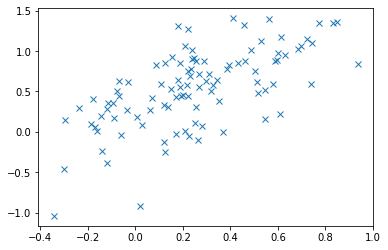

In [ ]:
plt.plot(x, y, 'x')
plt.show()

Función de Distribución Empírica

In [ ]:
def f_emp(x, datos):
  datos.sort()
  delta = 1/len(datos)
  indices = list(np.where(datos > x))[0]
  if len(indices) >= 1:
    ind = indices[0]
  else:
    ind = len(datos)
  return ind*delta

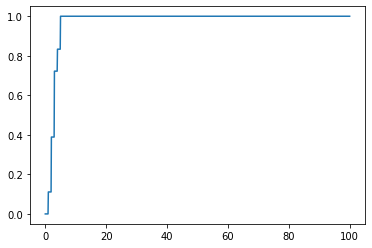

In [ ]:
x = np.linspace(0, 100, 1000)
y = [f_emp(item, datos) for item in x]
plt.plot(x,y,'-')